In [1]:
import pandas as pd

In [2]:
qvals = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/lead_caQTL_variants.tsv.gz", sep="\t", header=0)



In [3]:
qvals.shape

(297308, 12)

In [5]:
qvals["chr"] = "chr"+qvals["Chr"].astype(str) 

In [6]:
qvals = qvals.sort_values('Log10_BF').drop_duplicates(["chr", "Ref", "Alt", "Pos"], keep='last')


In [7]:
qvals.shape

(199326, 13)

In [8]:
data_dnase = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/DNASE/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_dnase[['Chrx', 'Posx', 'REF', 'ALT']] = data_dnase['rsid'].str.split("_", expand=True)

data_atac = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/ATAC/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_atac[['Chrx', 'Posx', 'REF', 'ALT']] = data_atac['rsid'].str.split("_", expand=True)


In [9]:
#plt.scatter(np.abs(qvals["Beta"]), qvals["Log10_BF"])

In [10]:
merged_atac = data_atac.merge(qvals, how="left", left_on=["chr", "allele1", "allele2", "pos"], right_on=["chr", "Ref", "Alt", "Pos"]).drop_duplicates()
merged_dnase = data_dnase.merge(qvals, how="left", left_on=["chr", "allele1", "allele2", "pos"], right_on=["chr", "Ref", "Alt", "Pos"]).drop_duplicates()


In [11]:
merged_atac.shape

(177813, 39)

In [12]:
data_atac.shape

(226346, 27)

In [13]:
merged_atac

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF
0,chr1,875770,A,G,chr1_875770_A_G,-0.007064,0.019171,0.638875,0.010017,0.345494,...,875770,rs4970379,A,G,0.62500,2,0.044994,0.155446,0.057836,-0.232537
1,chr1,930533,C,G,chr1_930533_C_G,0.067004,0.067004,0.221500,0.013255,0.217156,...,930533,rs3128110,C,G,0.35435,0,0.099392,0.174020,0.040562,1.751829
2,chr1,565286,C,T,chr1_565286_C_T,0.025990,0.033121,0.444937,0.009459,0.394183,...,565286,rs1578391,C,T,0.59780,1,0.998561,0.886884,0.188153,3.085214
3,chr1,569204,T,C,chr1_569204_T_C,-0.040934,0.051658,0.293225,0.018886,0.119670,...,569204,rs112660509,T,C,0.40125,1,0.477613,0.251458,0.140264,-0.671608
4,chr1,748141,G,A,chr1_748141_G_A,-0.034312,0.068099,0.223811,0.008248,0.466251,...,748141,rs2427893,G,A,0.05005,0,0.988758,0.347965,0.059578,4.597219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226341,chr22,51021271,T,C,chr22_51021271_T_C,-0.018318,0.041597,0.376340,0.012623,0.229670,...,51021271,rs540889063,T,C,0.05500,1,0.362698,0.010717,0.018974,-2.153040
226342,chr22,51059483,G,A,chr22_51059483_G_A,-0.044313,0.054137,0.313944,0.012971,0.237091,...,51059483,rs76733141,G,A,0.06000,1,0.553273,-0.061982,0.032636,-1.221145
226343,chr22,51066552,C,G,chr22_51066552_C_G,-0.085015,0.086177,0.171138,0.019822,0.102727,...,51066552,rs6151406,C,G,0.06000,1,0.921861,0.087364,0.030622,-0.324830
226344,chr22,51082407,T,A,chr22_51082407_T_A,-0.030337,0.030337,0.479451,0.004881,0.833830,...,51082407,rs62241515,T,A,0.42505,1,0.315251,-0.016347,0.055462,-1.737317


In [13]:
import matplotlib.pyplot as plt

In [14]:
merged_atac.shape

(177813, 39)

In [15]:
merged_atac.columns                                                                                                                 

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chrx', 'Posx', 'REF', 'ALT',
       'Peak', 'Chr', 'Pos', 'RsID', 'Ref', 'Alt', 'AF', 'Inside_Peak',
       'P_Lead', 'Beta', 'SE', 'Log10_BF'],
      dtype='object')

In [16]:
import numpy as np
merged_atac["jsd_sign.mean"] = merged_atac["jsd.mean"]*np.sign(merged_atac["logfc.mean"])
merged_dnase["jsd_sign.mean"] = merged_dnase["jsd.mean"]*np.sign(merged_dnase["logfc.mean"])


<AxesSubplot:xlabel='Beta', ylabel='sd_sign.mean'>

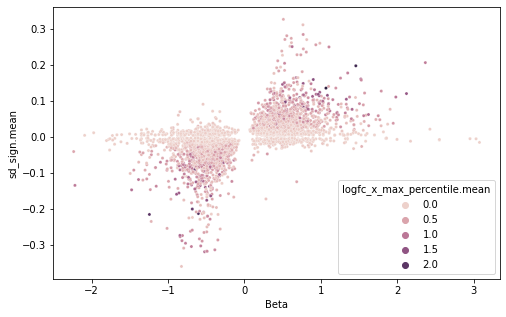

In [17]:
import seaborn as sns

plt.figure(figsize=(8,5))
data = pd.DataFrame()
data["sd_sign.mean"] = merged_atac[merged_atac["Log10_BF"] > 10]["jsd_sign.mean"]
data["Beta"] = merged_atac[merged_atac["Log10_BF"] > 10]["Beta"]
data["logfc_x_max_percentile.mean"] = abs(merged_atac[merged_atac["Log10_BF"] > 10]["logfc_x_max_percentile.mean"])

sns.scatterplot(data=data, y="sd_sign.mean", x="Beta", hue="logfc_x_max_percentile.mean", s=10)


<AxesSubplot:xlabel='Beta', ylabel='sd_sign.mean'>

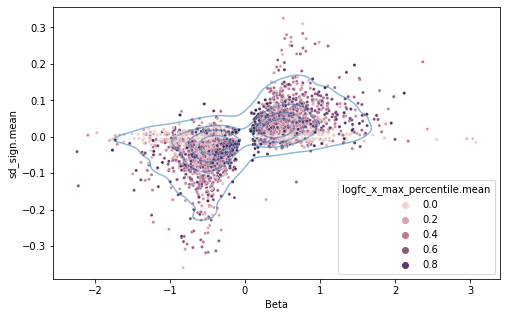

In [18]:
import seaborn as sns

plt.figure(figsize=(8,5))

data = pd.DataFrame()
data["sd_sign.mean"] = merged_atac[merged_atac["Log10_BF"] > 10]["jsd_sign.mean"]
data["Beta"] = merged_atac[merged_atac["Log10_BF"] > 10]["Beta"]
data["logfc_x_max_percentile.mean"] = abs(merged_atac[merged_atac["Log10_BF"] > 10]["max_percentile.mean"])


ax = sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.5,
    cut=2,
)


sns.scatterplot(data=data, y="sd_sign.mean", x="Beta", hue="logfc_x_max_percentile.mean", s=10, ax=ax)


   sd_sign.mean      Beta  max_percentile.mean
0     -0.017476  0.612583             0.130124
1      0.022865  0.612583             0.139722
2     -0.044784 -0.666789             0.810766
3     -0.013253 -1.042415             0.338230
4     -0.028709 -0.767072             0.568747


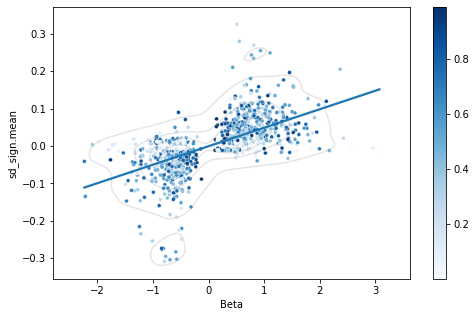

In [47]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 


data = pd.DataFrame()
data["sd_sign.mean"] = merged_atac[merged_atac["Log10_BF"] > 20]["jsd_sign.mean"]
data["Beta"] = merged_atac[merged_atac["Log10_BF"] > 20]["Beta"]
data["max_percentile.mean"] = abs(merged_atac[merged_atac["Log10_BF"] > 20]["max_percentile.mean"])
data = data.reset_index(drop=True)
print(data.head())
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="Blues")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None)
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)


plt.savefig("subfigs_new/caqtls_scatter_plot.pdf", transparent=True, dpi=300)

Text(0, 0.5, 'ChromBPNet effect sizes')

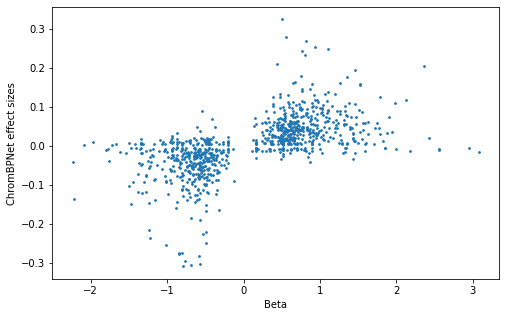

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(data["Beta"], data["sd_sign.mean"], s=3)
plt.xlabel("Beta")
plt.ylabel("ChromBPNet effect sizes")

Text(0, 0.5, 'ChromBPNet effect sizes')

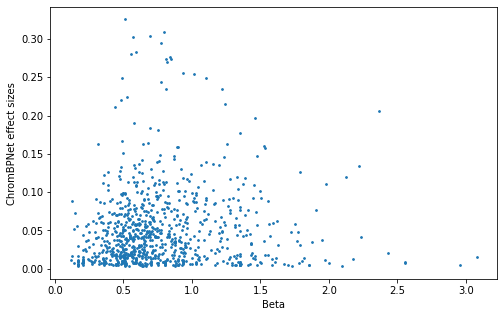

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(np.abs(data["Beta"]), np.abs(data["sd_sign.mean"]), s=3)
plt.xlabel("Beta")
plt.ylabel("ChromBPNet effect sizes")

In [67]:
scipy.stats.spearmanr(np.abs(data["Beta"]), np.abs(data["sd_sign.mean"]))

SpearmanrResult(correlation=0.10976027795315842, pvalue=0.0010388956936528088)

In [68]:
scipy.stats.spearmanr(data["Beta"], data["sd_sign.mean"])

SpearmanrResult(correlation=0.6911153355652425, pvalue=2.3228434956688086e-127)

   sd_sign.mean      Beta  max_percentile.mean
0     -0.027965  0.612583             0.180722
1      0.027266  0.612583             0.217063
2     -0.065800 -0.666789             0.699288
3     -0.038162 -1.042415             0.226273
4     -0.067371 -0.767072             0.543838


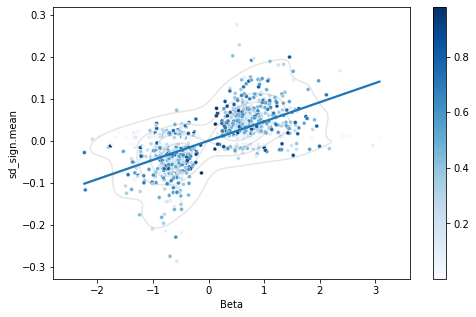

In [20]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 


data = pd.DataFrame()
data["sd_sign.mean"] = merged_dnase[merged_dnase["Log10_BF"] > 20]["jsd_sign.mean"]
data["Beta"] = merged_dnase[merged_dnase["Log10_BF"] > 20]["Beta"]
data["max_percentile.mean"] = abs(merged_dnase[merged_dnase["Log10_BF"] > 20]["max_percentile.mean"])
data = data.reset_index(drop=True)
print(data.head())
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="Blues")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None)
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)


plt.savefig("subfigs_new/caqtls_scatter_plot_dnase.pdf", transparent=True, dpi=300)

In [40]:
sum(merged_dnase["Log10_BF"] > 20

890

<AxesSubplot:>

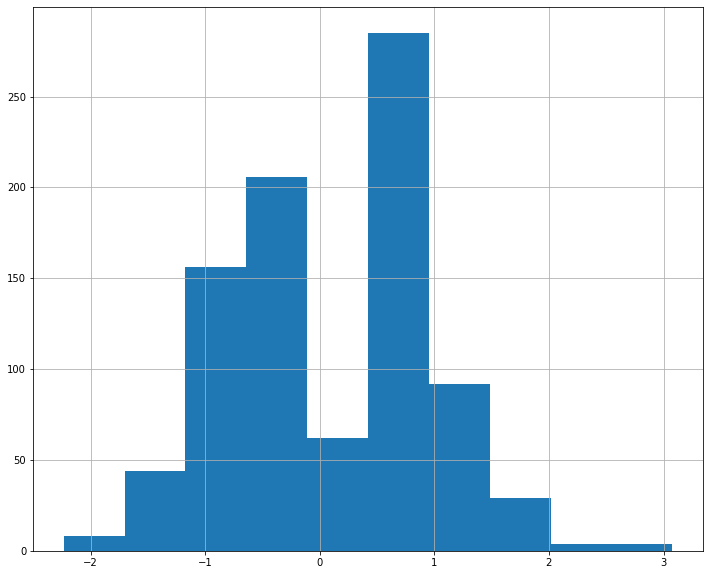

In [43]:
merged_dnase[merged_dnase["Log10_BF"]>20].reset_index()["Beta"].hist()

In [21]:
# p = (ggplot(data, aes('Beta', 'sd_sign.mean', color='max_percentile.mean'))
#  + geom_point(alpha=1,size=0.1)
# + geom_density_2d(data=data, mapping=aes('Beta', 'sd_sign.mean'))

# + xlab("Observed")
# # + scale_color_gradient(low='#ADD8E6', high='#0000FF')
#  + ylab("Predicted")
#  + theme_classic() 
# )
# p  + geom_smooth(method = "lm", se = False, color="black", size=0.2)
# #p.save("subfigs_new/caqtls_scatter_plot.pdf",dpi="300")
# #p.save("subfigs/bqtls_atac_significant_hits.pdf",dpi="300")

In [22]:
import scipy.stats

In [23]:
print(scipy.stats.pearsonr(abs(merged_atac[merged_atac["Log10_BF"] > 2]["Beta"]), merged_atac[merged_atac["Log10_BF"] > 2]["logfc_x_max_percentile.mean"]))




(0.06987054410394265, 1.9068004947079224e-22)


In [24]:
print(scipy.stats.pearsonr(merged_atac[merged_atac["Log10_BF"] > 20]["Beta"], merged_atac[merged_atac["Log10_BF"] > 20]["jsd_sign.mean"]))


(0.5949174416723931, 2.6143639485680015e-86)


In [25]:
print(scipy.stats.pearsonr(merged_dnase[merged_dnase["Log10_BF"] > 20]["Beta"], merged_dnase[merged_dnase["Log10_BF"] > 20]["jsd_sign.mean"]))



(0.6091514362357896, 1.6706179667309814e-91)


In [26]:
from sklearn.decomposition import PCA
import scipy.stats
def get_pc_component(df1):
    val1 = df1["jsd.mean"].astype(float)*np.sign(df1['logfc.mean'].astype(float))
    val2 = df1["logfc.mean"].astype(float)
    val3 = df1["jsd.mean"].astype(float)*df1['logfc.mean'].astype(float)
    #val4 = df1["log_prob_log2s.mean"].astype(float)*df1['logfc.mean'].astype(float)

    #print(df1.shape)
    values = [val2, val3]
    values = np.array(values)
    #print(values.shape)
    values = np.transpose(values)
    mean_axis = np.mean(values, axis=1)
    new_values = PCA(n_components=1).fit_transform(X=values)
    #print(new_values.shape)
    if scipy.stats.pearsonr(new_values[:,0], mean_axis)[0] > 0:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]
    else:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]*-1

In [27]:
logbg = []
pearsonrs = []
pearsonrs_dnase = []
num_vals = []
num_vals_dnase = []

for threshold in np.arange(2,30,4):
    logbg.append(threshold)
    pearsonrs.append(scipy.stats.pearsonr(merged_atac[merged_atac["Log10_BF"] > threshold]["Beta"], merged_atac[merged_atac["Log10_BF"] > threshold]["jsd_sign.mean"])[0])
    pearsonrs_dnase.append(scipy.stats.pearsonr(merged_dnase[merged_dnase["Log10_BF"] > threshold]["Beta"], merged_dnase[merged_dnase["Log10_BF"] > threshold]["jsd_sign.mean"])[0])
    num_vals.append(sum(merged_atac["Log10_BF"] > threshold))
    num_vals_dnase.append(sum(merged_dnase["Log10_BF"] > threshold))


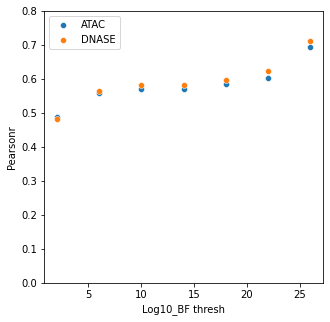

In [28]:
plt.figure(figsize=(5,5))
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

data=pd.DataFrame()
data["Log10_BF thresh"]=logbg
data["Pearsonr"]=pearsonrs
data_dnase=pd.DataFrame()
data_dnase["Log10_BF thresh"]=logbg
data_dnase["Pearsonr"]=pearsonrs_dnase
sns.scatterplot(data=data,x="Log10_BF thresh",y="Pearsonr", label="ATAC")
sns.scatterplot(data=data_dnase,x="Log10_BF thresh",y="Pearsonr", label="DNASE")
plt.ylim((0,0.8))
plt.savefig("subfigs_new/"+"pearsonr_caqtls.pdf", transparent=True, dpi=300)

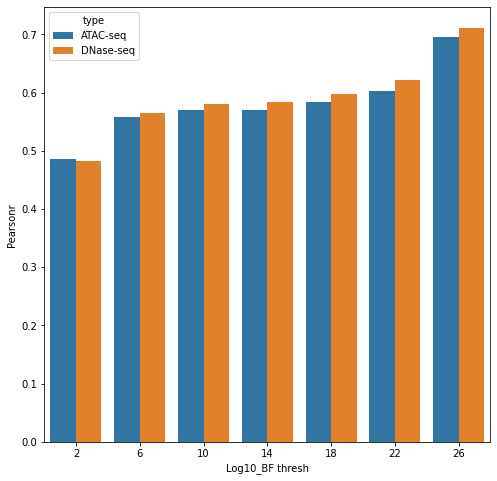

In [29]:
 import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))
data=pd.DataFrame()
data["Log10_BF thresh"]=logbg+logbg
data["Pearsonr"]=pearsonrs+pearsonrs_dnase
data["type"] = ["ATAC-seq"]*len(pearsonrs) + ["DNase-seq"]*len(pearsonrs_dnase)
g = sns.barplot(data=data,x="Log10_BF thresh",y="Pearsonr", hue="type")

#for index, row in data.iterrows():
#    g.text(row.name, row.Pearsonr+0.01, "n="+str(num_vals[index]), color='black', ha='center', rotation=90)

plt.savefig("subfigs_new/"+"pearsonr_caqtls.pdf", transparent=True, dpi=300)

In [30]:
logbg = []
pearsonrs = []
pearsonrs_dnase = []
num_vals = []
num_vals_dnase = []

for threshold in np.arange(2,30,4):
    logbg.append(threshold)
    pearsonrs.append(scipy.stats.pearsonr(merged_atac[merged_atac["Log10_BF"] > threshold]["Beta"], get_pc_component(merged_atac)[merged_atac["Log10_BF"] > threshold])[0])
    pearsonrs_dnase.append(scipy.stats.pearsonr(merged_dnase[merged_dnase["Log10_BF"] > threshold]["Beta"], get_pc_component(merged_dnase)[merged_dnase["Log10_BF"] > threshold])[0])
    num_vals.append(sum(merged_atac["Log10_BF"] > threshold))
    num_vals_dnase.append(sum(merged_dnase["Log10_BF"] > threshold))


(0.0, 0.8)

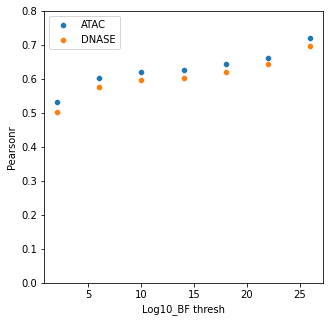

In [31]:
plt.figure(figsize=(5,5))
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

data=pd.DataFrame()
data["Log10_BF thresh"]=logbg
data["Pearsonr"]=pearsonrs
data_dnase=pd.DataFrame()
data_dnase["Log10_BF thresh"]=logbg
data_dnase["Pearsonr"]=pearsonrs_dnase
sns.scatterplot(data=data,x="Log10_BF thresh",y="Pearsonr", label="ATAC")
sns.scatterplot(data=data_dnase,x="Log10_BF thresh",y="Pearsonr", label="DNASE")
plt.ylim((0,0.8))
#plt.savefig("subfigs_new/"+"pearsonr_caqtls.pdf", transparent=True, dpi=300)

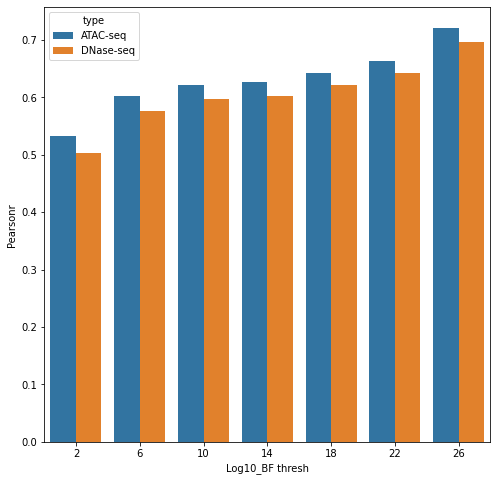

In [32]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))
data=pd.DataFrame()
data["Log10_BF thresh"]=logbg+logbg
data["Pearsonr"]=pearsonrs+pearsonrs_dnase
data["type"] = ["ATAC-seq"]*len(pearsonrs) + ["DNase-seq"]*len(pearsonrs_dnase)
g = sns.barplot(data=data,x="Log10_BF thresh",y="Pearsonr", hue="type")

#for index, row in data.iterrows():
#    g.text(row.name, row.Pearsonr+0.01, "n="+str(num_vals[index]), color='black', ha='center', rotation=90)

plt.savefig("subfigs_new/"+"pearsonr_caqtls.pdf", transparent=True, dpi=300)

In [33]:
print(scipy.stats.pearsonr(merged_atac[merged_atac["Log10_BF"] > 20]["Beta"], get_pc_component(merged_atac)[merged_dnase["Log10_BF"] > 20]))


(0.652016328072736, 7.297886765620119e-109)


In [34]:
import matplotlib

import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 10]

def plot_enrichment_curves(df, compare_score, model_score, output_file, compare_score_ascending=False, model_score_ascending=True,
                           thresh_list=[0.5, 0.1, 0.05, 0.01, 0.005, 0.001], subsample=False, ymax='auto', debug=False):
    by_thresh_dict = {'score':[], 'ratio':[], 'thresh':[]}
    
    #df[model_score+"_abs"] = np.abs(df[model_score])
    #model_score = model_score+"_abs"
    print(model_score)
    #thresh_list = [df[model_score].quantile(1-0.5), df[model_score].quantile(1-0.1), df[model_score].quantile(1-0.05), df[model_score].quantile(1-0.01),
    #              df[model_score].quantile(1-0.005), df[model_score].quantile(1-0.001), df[model_score].quantile(1-0.0005), df[model_score].quantile(1-0.0001)]
    print(thresh_list)
    for thresh in thresh_list:
        df[compare_score].fillna(0, inplace=True)
        sample_df = df.sort_values(by=[compare_score, model_score], ascending=[False, True])
        #print(sample_df.head())
        #print(sample_df.tail())
        print(thresh)
        print(sum(sample_df[model_score] < thresh))
        ratio = len(sample_df.loc[sample_df[model_score] < thresh]) / len(sample_df)
        sample_df['sig'] = sample_df[model_score].apply(lambda x: x < thresh)
        sample_df['expected'] = [ratio] * len(sample_df)
        expected = sample_df['expected'].cumsum().tolist()
        observed = sample_df['sig'].cumsum().tolist()
        
        enrich_ratio = np.array(observed) / np.array(expected)
        compare_vals = sample_df[compare_score].tolist()
        enrich_ratio = enrich_ratio.tolist()
        assert len(compare_vals) == len(enrich_ratio)
        by_thresh_dict['ratio'].extend(enrich_ratio)
        by_thresh_dict['score'].extend(compare_vals)
        by_thresh_dict['thresh'].extend([thresh] * len(sample_df))
        
        if debug:
            print(thresh)
            print('Expected:', expected[:10])
            print('Observed:', observed[:10])
            print('Ratio:', enrich_ratio[:10])
            print('Compare Scores:', compare_vals[:10])
            print()
        
    by_thresh_df = pd.DataFrame(by_thresh_dict)
    by_thresh_df.sort_values(by=['score'], ascending=False, inplace=True)
    if subsample:
        by_thresh_df = pd.concat([by_thresh_df.iloc[:20000,].copy(), by_thresh_df.iloc[20000:,].copy().sample(30000)])
    return by_thresh_df
    #plt.show()

In [35]:

by_thresh_df = plot_enrichment_curves(merged_atac,
                       compare_score='Log10_BF', model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="lcl_caqtls_latest.pdf")

abs_logfc_x_jsd_x_max_percentile.mean.pval
[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
0.5
124037
0.1
40278
0.05
22372
0.01
5995
0.005
3449
0.001
881


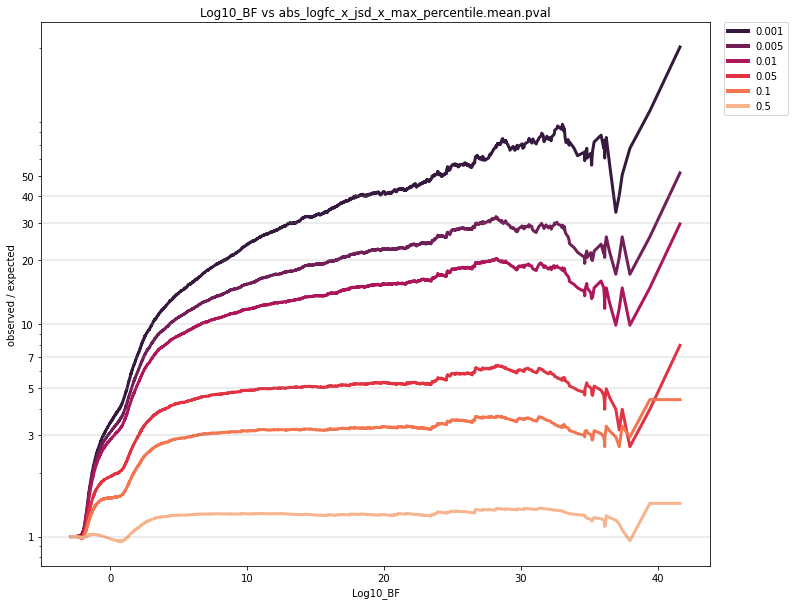

In [36]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

compare_score='Log10_BF'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 6))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
output_file="lcl_caqtls_latest.pdf"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 30, 40, 50])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=30, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)

plt.savefig("subfigs_new/"+"caqtls_all_gafney.pdf", transparent=True, dpi=300)

In [37]:

by_thresh_df = plot_enrichment_curves(merged_dnase,
                       compare_score='Log10_BF',model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="lcl_caqtls_latest.pdf")

abs_logfc_x_jsd_x_max_percentile.mean.pval
[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
0.5
118885
0.1
34763
0.05
18707
0.01
4579
0.005
2506
0.001
607


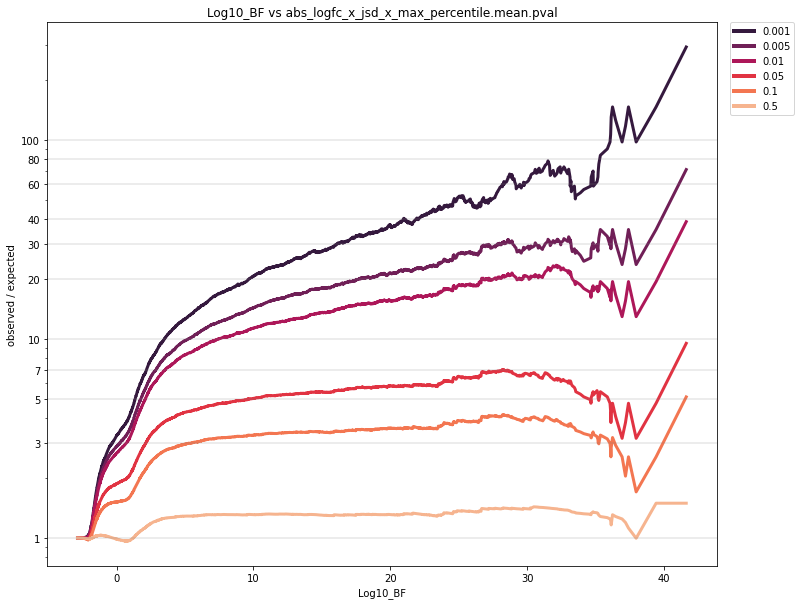

In [38]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

compare_score='Log10_BF'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 6))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
output_file="lcl_caqtls_latest.pdf"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 30, 40, 60,80,100])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=30, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=60, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=80, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=100, color='grey', linestyle='-', alpha=0.2)

plt.savefig("subfigs_new/"+"caqtls_all_gafney_dnase.pdf", transparent=True, dpi=300)